In [64]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib

In [67]:
matplotlib.rcParams['figure.figsize'] = (10, 10)

## Présentation

Dans ce notebook, on essaye de classifier la condition deep-sevoflurane grâce à la méthode CEBRA.

## Data Loading

Dans le train, on garde les singes 'almira', 'khali', 'kimiko', 'rana'.
Dans le test, on utilise 'jade'.

In [2]:
dfc = np.load('/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/inputs.npy')
meta = pd.read_csv("/neurospin/lbi/monkeyfmri/deepstim/database/ANESTHETIC_database/derivatives/reference_kmeans/inputs/metadata.tsv", sep="\t")

In [3]:
n_runs = len(set(meta["unique_id"] + meta["monkey"]))
n_wins = 464
dfc_all = dfc.reshape((-1, n_wins, 82, 82))

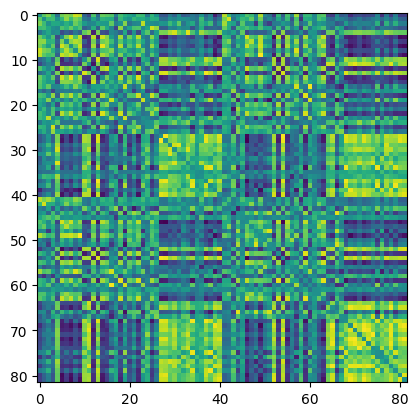

In [4]:
plt.imshow(dfc_all[100,25,:,:])

In [4]:
labels_session = np.array([meta["condition"].iloc[i*464] for i in range(len(meta)//464)])

In [5]:
dict_conditions = {"awake":0, "ketamine":1, "light-propofol":2, "deep-propofol":3, "light-sevoflurane":4, "deep-sevoflurane":5}
dict_conditions_inverse = {0:"awake", 1:"ketamine", 2:"light-propofol", 3:"deep-propofol", 4:"light-sevoflurane", 5:"deep-sevoflurane"}

In [12]:
labels_sessions_conditions = np.array([dict_conditions[elem] for elem in labels_session])
labels_sessions = np.concatenate([464*[dict_conditions[elem]] for elem in labels_session])

In [13]:
labels_sessions

array([0, 0, 0, ..., 5, 5, 5])

## Marker max and mean

In [113]:
dfc_abs = np.abs(dfc_all)
dfc_neg = dfc_all * (dfc_all < 0)
dfc_max = np.max(np.max(dfc_all,axis = -1),axis=-1)
dfc_min = np.min(np.min(dfc_all,axis = -1),axis=-1)
dfc_mean = np.mean(np.mean(dfc_abs,axis = -1),axis = -1)

In [114]:
tab = dfc_mean.reshape(156*464)

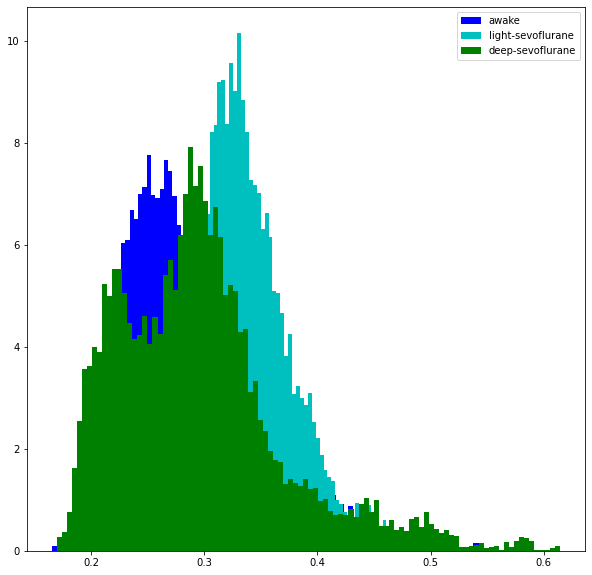

In [115]:
plt.hist(tab[labels_sessions == 0],bins = 100,label = dict_conditions_inverse[0],density="True",color = "b")
#plt.hist(tab[labels_sessions == 1],bins = 100,label = dict_conditions_inverse[1],density="True",color = "r")
#plt.hist(tab[labels_sessions == 2],bins = 100,label = dict_conditions_inverse[2],density="True",color = "y")
#plt.hist(tab[labels_sessions == 3],bins = 100,label = dict_conditions_inverse[3],density="True",color = "k")
plt.hist(tab[labels_sessions == 4],bins = 100,label = dict_conditions_inverse[4],density="True", color = "c")
plt.hist(tab[labels_sessions == 5],bins = 100,label = dict_conditions_inverse[5],density="True", color = "g")
plt.legend()
plt.show()